In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import datetime
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["figure.figsize"] = (20,4)

import warnings
warnings.filterwarnings("ignore")
#np.warnings.resetwarnings()

In [2]:
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
pd.options.display.float_format = '{:20,.2f}'.format

## Oil prices
### Follow up: we want to see if inflation adjusted prices will have any significantly different result from our "Oil Price" notebook.  

In [3]:
df = pd.read_csv(r'.\data\wti-daily.csv')

In [4]:
df.head(2)

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.index=df.Date
df=df.drop('Date', axis=1)

Text(0,0.5,'price $')

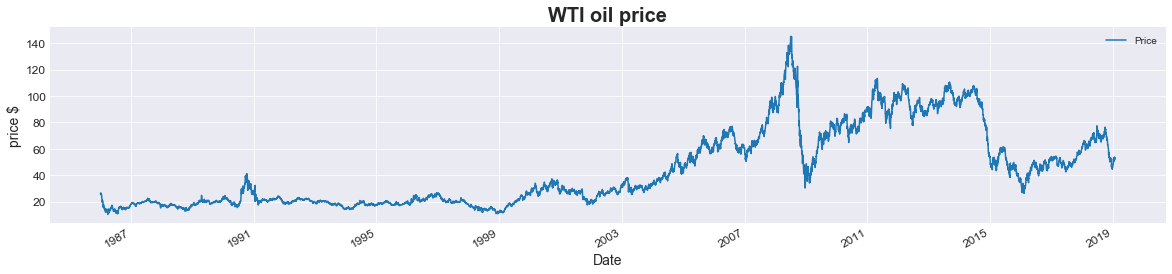

In [6]:
plt.rcParams["figure.figsize"] = (20,4)
df.plot()
plt.title("WTI oil price", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("price $")

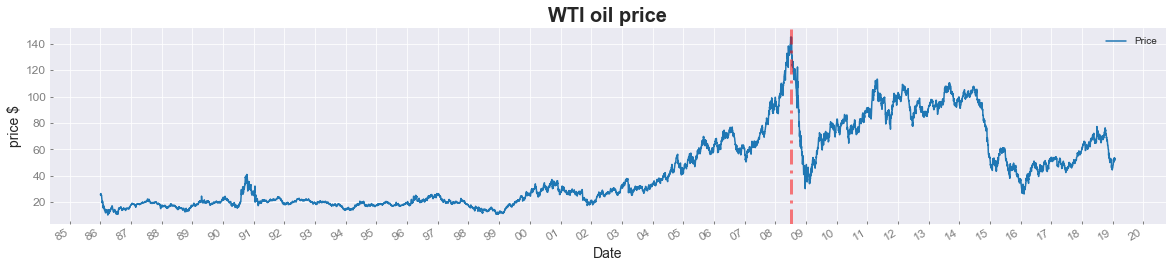

In [7]:
price_max= pd.to_datetime("2008-07-03")
ax = df.plot()
plt.title("WTI oil price", fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.axvline(price_max, color ='red', alpha=0.5, dashes=(5, 2, 1, 2), linewidth=3.0)
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

## Monthly mean

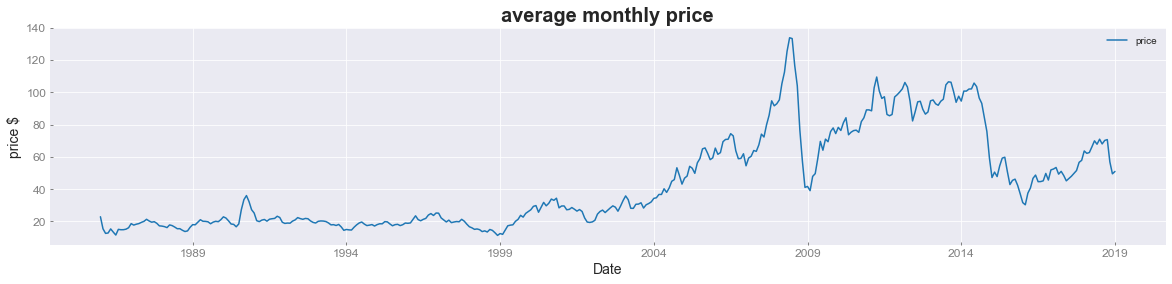

In [8]:
monthly_mean=df.resample('MS').mean()
monthly_mean.columns=['price']
ax = monthly_mean.plot()
plt.title("average monthly price", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

In [9]:
#import cpi data downloaded from Department of Labor
cpi = pd.read_excel('./data/CPI_all_urban_SeriesReport-20190426102108_bcf8a6.xlsx', index_col=0, skiprows=11)
cpi = cpi.iloc[:,0:11]

cpi.reset_index(drop=False, inplace=True)
cpi =pd.melt(cpi,'Year',var_name="Month",
value_name="cpi")
cpi['Day']=1
cpi['Month']=pd.to_datetime(cpi.Month, format='%b').dt.month
cpi.index=pd.to_datetime(cpi.loc[:,['Year','Month','Day']])
cpi.sort_index(inplace=True)
cpi.drop(['Year','Month','Day'], axis=1, inplace=True)

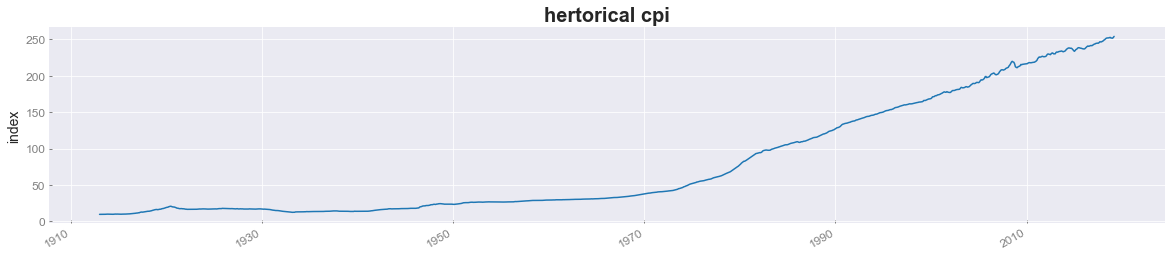

In [10]:
ax = cpi.cpi.plot()
plt.title("hertorical cpi", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("index")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

In [11]:
cpi = cpi.loc['1983-07-01':'2019-03-01']
cpi['adjust']= cpi.loc['2019-03-01'].cpi/cpi.cpi

In [12]:
cpi.head()

,cpi,adjust
1983-07-01,99.90,2.54
1983-08-01,100.20,2.54
1983-09-01,100.70,2.52
1983-10-01,101.00,2.52
1983-11-01,101.20,2.51


In [13]:
wti_cpi = pd.merge(left= monthly_mean, right= cpi, how='inner', left_index=True, right_index=True)
wti_cpi['price_adj'] = wti_cpi.price*wti_cpi.adjust
wti_cpi = wti_cpi.loc[:,['price','price_adj']]

Text(0,0.5,'$ price')

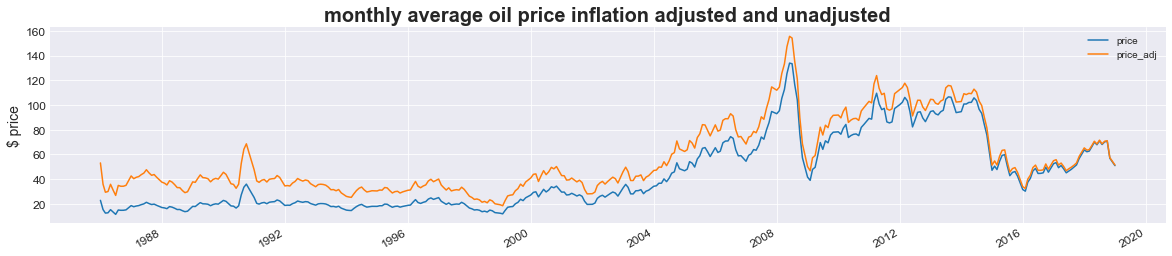

In [14]:
wti_cpi.plot()
ax = plt.title("monthly average oil price inflation adjusted and unadjusted", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("$ price")


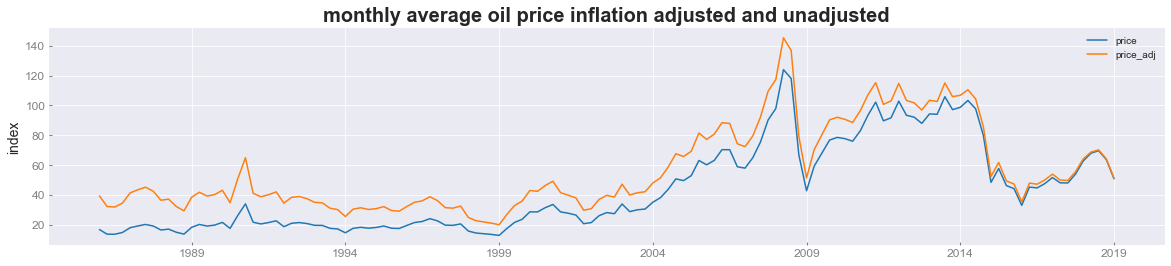

In [15]:
#quarterly
wti_cpi = wti_cpi.resample('q').mean()
ax = wti_cpi.plot()
plt.title("monthly average oil price inflation adjusted and unadjusted", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("index")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

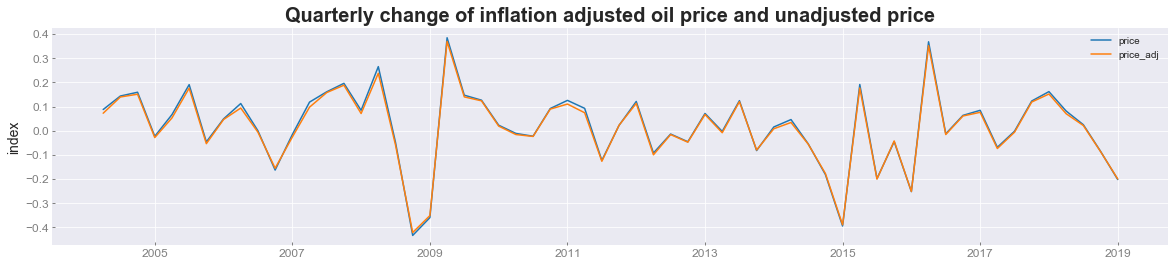

In [16]:
ax = wti_cpi.loc['2004':,:].pct_change().plot()
plt.title("Quarterly change of inflation adjusted oil price and unadjusted price", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("index")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

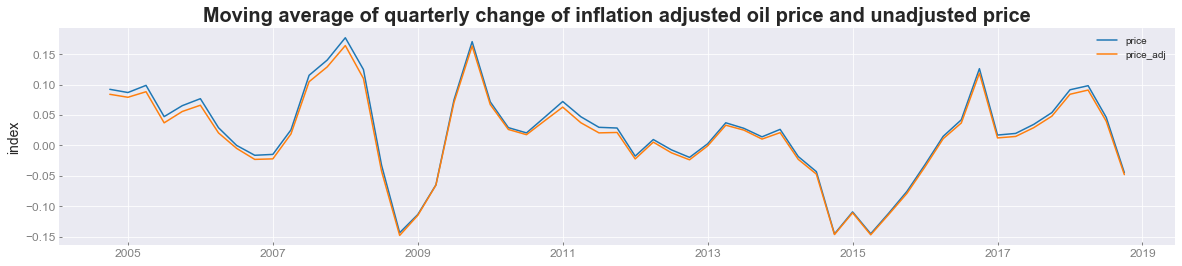

In [17]:
ax = wti_cpi.loc['2004':,:].pct_change().rolling(4, center = True).mean().plot()
plt.title("Moving average of quarterly change of inflation adjusted oil price and unadjusted price", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("index")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

In [18]:
wti_cpi['qtr'] =wti_cpi.index.quarter
wti_cpi['year'] = wti_cpi.index.year
wti_cpi['QoQ'] =wti_cpi.price_adj.pct_change()
wti_cpi= wti_cpi.loc['2004':,['price_adj','QoQ' ,'year','qtr']]

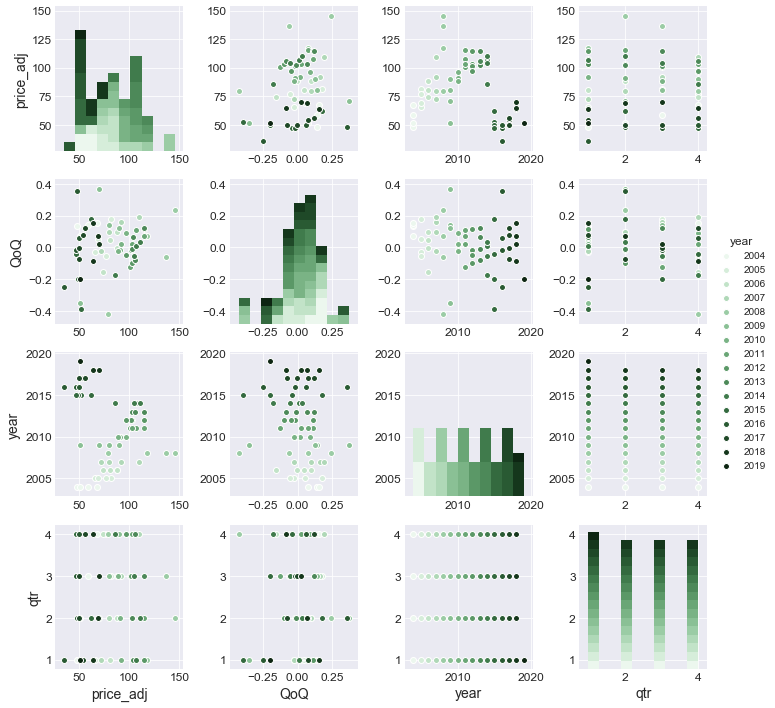

In [19]:
palette = sns.cubehelix_palette(18, start=2, rot=0, dark=0, light = 0.95, reverse = False)
sns.pairplot(wti_cpi,palette=palette, hue='year' )

## Seasonality

Text(0.5,1,'boxplot of inflation adjusted prices by quarter')

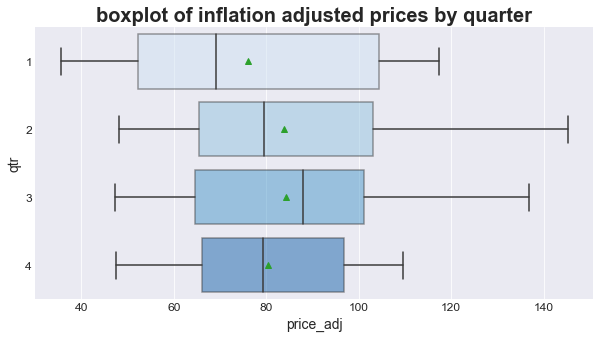

In [20]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot( x='price_adj', y='qtr', data=wti_cpi, showmeans=True,saturation=1.00, orient='h',boxprops=dict(alpha=.5),  palette ='Blues')
plt.title("boxplot of inflation adjusted prices by quarter", fontdict={'fontsize': 20, 'fontweight': 'bold'})
